**Student Name**:Uğur Ali Kaplan

**Student ID**: 150170042

In [1]:
import pyautogui as pg
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from scipy.signal import convolve2d

<h2>Part 1</h2>

Screenshotting part is added as a separate script.

In [2]:
ss = cv2.imread("ss.png", 0)

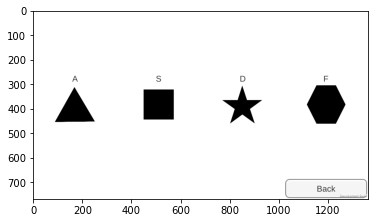

In [3]:
plt.imshow(ss, cmap="gray")

In [4]:
# Define vertical and horizontal Sobel filters

S_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

S_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

In [5]:
x_filtered = convolve2d(ss, S_x, mode="same")

In [6]:
y_filtered = convolve2d(ss, S_y, mode="same")

In [7]:
sobel_filtered = np.sqrt(x_filtered**2 + y_filtered**2)

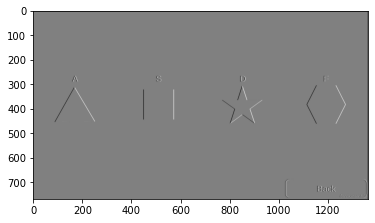

In [8]:
plt.imshow(x_filtered, cmap="gray")

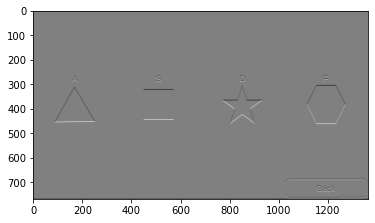

In [9]:
plt.imshow(y_filtered, cmap="gray")

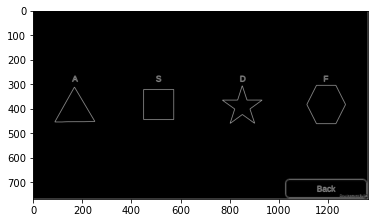

In [10]:
plt.imshow(sobel_filtered, cmap="gray")

<h2>Part 2</h2>

In [11]:
cannyEdges = cv2.Canny(ss,100,200)

In [12]:
cv2.imwrite("cannyEdges.png", cannyEdges)

True

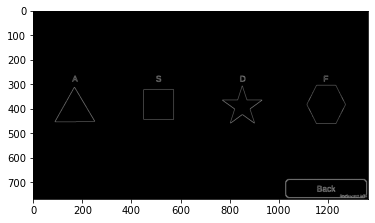

In [13]:
plt.imshow(cannyEdges, cmap="gray")

In [14]:
contours, hierarchy = cv2.findContours(cannyEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

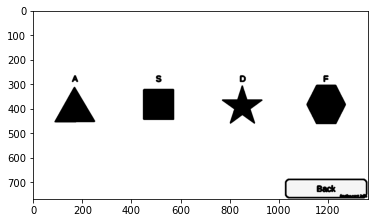

In [15]:
plt.imshow(cv2.drawContours(ss, contours, -1, (0,255,0), 3), cmap="gray")

In [16]:
cv2.imwrite("contours.png", cv2.drawContours(ss, contours, -1, (0,255,0), 3))

True

<h2>Part 3</h2>

In [18]:
# Use the image gradients calculated by the Sobel Filter in Part 1.
image_x = x_filtered
image_y = y_filtered

# Loop through the calculated gradients
H, W = image_x.shape
window_H, window_W = 3, 3
corners = list()

for h in range(295, 470 - window_H):
    if h % 10 == 0:
            print(f"H: {h}") # Takes a long time, need to see the progress
    for w in range(0, W - window_W):
        gradients_x = image_x[h:h+window_H, w:w+window_W].astype(np.float32) # Gradients for the current pixel
        gradients_y = image_y[h:h+window_H, w:w+window_W].astype(np.float32)
        mean_x, mean_y = np.mean(gradients_x), np.mean(gradients_y) 
        gradients_x -= mean_x # Subtract the mean and center the gradients
        gradients_y -= mean_y
        cov = np.zeros((2, 2)) # Initialize covariance matrix
        cov[0, 0] = np.sum(np.multiply(gradients_x, gradients_x))
        cov[0, 1] = np.sum(np.multiply(gradients_x, gradients_y))
        cov[1, 0] = np.sum(np.multiply(gradients_x, gradients_y))
        cov[1, 1] = np.sum(np.multiply(gradients_y, gradients_y))
        
        eigs = np.linalg.eigvalsh(cov) # Find eigenvalues of the matrix, we can use eigvalsh since cov is symmetric
        if min(eigs) > 100000: # Apply minimum threshold
            corners.append((h, w, min(eigs)))

H: 300
H: 310
H: 320
H: 330
H: 340
H: 350
H: 360
H: 370
H: 380
H: 390
H: 400
H: 410
H: 420
H: 430
H: 440
H: 450
H: 460


In [19]:
corners_th250000 = list()
for point in corners:
    if point[2] > 250000:
        corners_th250000.append((point[0], point[1]))
        
corners_th250000 = np.array(corners_th250000)

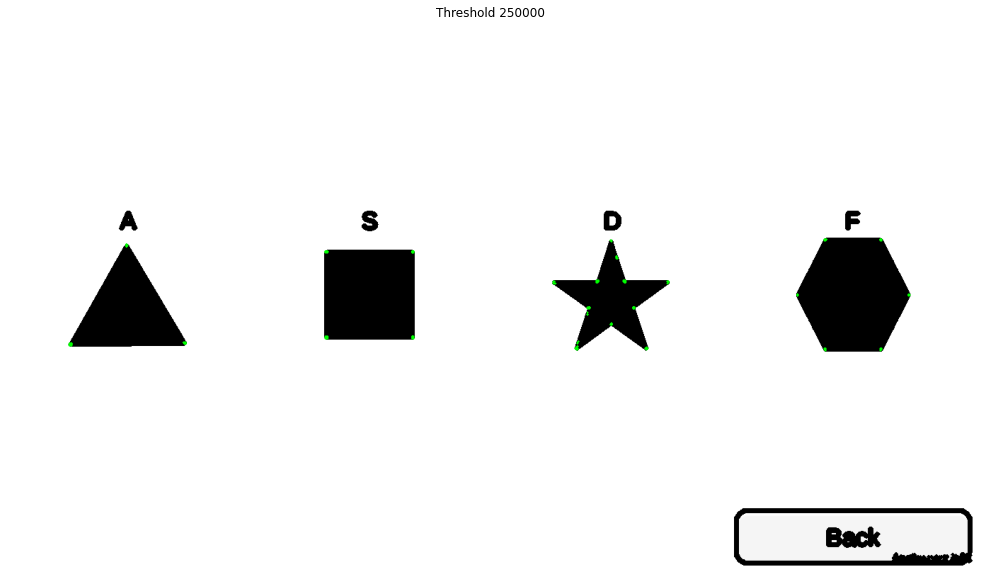

In [20]:
# Show the corners on top of the screenshot
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.imshow(ss, cmap="gray")
ax.scatter(corners_th250000[:, 1], corners_th250000[:, 0], s=1, color="lime")
ax.set_title("Threshold 250000")
plt.axis("off")
plt.show()

<h2>Part 4</h2>

In [587]:
time.sleep(2)
it = 0
found = 0
while found < 19:
    time.sleep(0.5)
    ss = np.array(pg.screenshot())
    ss = cv2.cvtColor(ss, cv2.COLOR_BGR2GRAY)
    
    region = ss[580:764, 510:850]
    cannyEdges = cv2.Canny(region,100,200)
    contours, _ = cv2.findContours(cannyEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) >= 2:
        found += 1
        # We have a shape to find out
        region = ss[580:764, 510:860]
        region[region == 206] = 255
        
        # Detect corners
        dst = cv2.cornerMinEigenVal(region, 2, 1)

        # Normalize
        dst_norm = np.empty(dst.shape, dtype=np.float32)
        cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
        
        e = dst_norm_scaled[dst_norm_scaled > 1].shape[0]

        if e > 1110:
            # hexagon
            #print(f"Hexagon {e}")
            pg.keyDown("f")
            pg.keyUp("f")
        elif e > 400:
            # star
            #print(f"Star {e}")
            pg.keyDown("d")
            pg.keyUp("d")
        elif e > 100:
            # triangle
            #print(f"Triangle {e}")
            pg.keyDown("a")
            pg.keyUp("a")
        else:
            # square
            #print(f"Square {e}")
            pg.keyDown("s")
            pg.keyUp("s")

    it += 1